# ACSE4-project-1-vesta4

## Armageddon - Atmospheric entry and disruption of asteroids

Develop a numerical simulator to assist in the hazard assessment of small asteroids entering the atmosphere

### Group members:  Richard Boyne, Chirayu Khimji, Ye Liu, Chen Zongpeng

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from asteroid_solver import asteroid
from test_asteroid_solver import *
import examples as ex
## WARNING jupyter notebooks refuses to load the final few functions in examples.py (however they are there and run fine)
## these include test_ensumble() compare_mars_tabulated()
## hence these functions may not work in this notebook, but will work in another python environment

plt.rc('axes', titlesize=20, labelsize=20)
plt.rc('axes.formatter', limits=[-4, 4])
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('lines', linewidth=1.5, markersize=7)
plt.rc('figure', figsize=(9, 9))
plt.rc('legend', fontsize=15)
plt.close('all')

# 1 Solution algorithm description



The problem of an asteroid falling through Earth's atomsphere is simplified to a set of equations that include:

- air resistance
- ablation (mass loss by firction)
- gravity
- lift
- planet curvature
- fragmentation

for these purposes the density is assumed constant throughout and radius constant untill fragmentation occurse.

## System of Equations

\begin{aligned} 
\frac{dv}{dt} & = \frac{-C_D\rho_a(z) A v^2}{2 m} + g \sin \theta \\
\frac{dm}{dt} & = \frac{-C_H\rho_a(z) A v^3}{2 Q} \\
\frac{d\theta}{dt} & = \frac{g\cos\theta}{v} - \frac{C_L\rho_a(z) A v}{2 m} - \frac{v\cos\theta}{R_P + z} \\
\frac{dz}{dt} & = -v\sin\theta \\
\frac{dx}{dt} & = \frac{v\cos\theta}{1 + z/R_P} \\
\frac{dr}{dt} & = \left[\frac{7}{2}\alpha\frac{\rho_a}{\rho_m}\right]^{1/2} v \hspace{1cm} \text{when} \hspace{.5cm} \rho_a v^2 = \sigma_0
\end{aligned} 

Ateroid Parameters:
$v$ velocity,
$m$ mass,
$\rho_m$ density,
$A$ cross-sectional area,
$\theta$ trajectory,
$x$ horizontal distance,
$z$ altitude,
$C_D$ drag coefficient,
$C_L$ lift coefficient,
$\alpha$ spreading coefficent

Other Parameters:
$Q$ specific heat of ablation,
$R_P$ planetary radius,
$\rho_a(z)$ atmospheric density,
$t$ is time 


## Solvers

Implemented multiple solvers for cross validation and to allow for user choice


### Scipy Odeint

Very popular solver that is gerally most stable, but less options can be chosen. Allows for change in rtol and atol and has automatic selection of time step.


### Scipy Solve_ivp
Less stable solver that allows for more customisation of the algorithm used. Also allows for change in rtol and atol and has automatic selection of time step.


## Notes on Implementation

- Class strcuture used as allows for multiple solves of the same system without re-initialising
- Also keeps all the initial conditions and constants together with the solution
- No need for lager number of passed vairables or use of the global namespace


- after ground hit results discarded and derivative function returns zero (prevent atmosphere error)
- energy per unit height found by finite difference method
- gravitational potential energy is disregarded for all energy considerations

# 2 Installation and 3 Demonstration

## How to Install

Software is lightweight, hence can be placed locally to where-ever it is to be used. Copy the asteroid_solver.py file to the directory requiered (move test_asteroid_solver.py if the software is to be modified or validated).

Dependencies:
- Numpy V1.15
- Scipy V1.1
- Matplotlib V3.3.0

(backward version compatibility not verified)

## How to use

Class asteroid from asteroid_solver.py attributes and methods for setting up and computing the asteroid simulation. Rough outline is:

- initialise the class to set initial conditions
- change constants from default if wanted
- solve the system with desired solver
- plot the simulation or print the outcomes

In [6]:
# asteroid class holds all the information for the system
# initialise by passing in the initial conditions of the asteroid

conditions = [10,              # radius
              19.2e3,          # velocity
              3300,            # density
              1e6,             # strength
              18.3*np.pi/180]  # angle (rads)
system = asteroid(*conditions)


### Initialising Options

- atmos_fun : pass in a function for atmospheric density of form func(z) where z is an altitude; Defualts as
$$ \rho_a = \rho_0 \exp{-\frac{z}{H}} $$ with $rho_0 = 1.2$ and $H = 8000$

- init_height : starting height of the meteorite; Defualts as $95km$

- init_mass : starting mass; Defualts is found by assuming spherical shape of uniform density

### Changing constants

Constants defult to the values given in brief. These are set as attributes to the asteroid class with the names .Cd, .Ch, .Q, .Cl, .alpha, .Rp, .g

e.g.

system.g = 0.

system.Rp = np.inf

In [7]:
# now the system is set we are ready to solve

system.solve_ode(n=10000, t_final=500, rtol=None, atol=None)

# n is the number of time values to record the result for
# t_final is the time to solve until
# rtol, atol are accuracy settings

# the results can be accessed from anywhere with
results = system.result


array([[ 1.92000000e+04,  1.38230077e+07,  3.19395253e-01,
         9.50000000e+04,  0.00000000e+00,  1.00000000e+01],
       [ 1.92001522e+04,  1.38230029e+07,  3.19278530e-01,
         9.46985891e+04,  8.98188887e+02,  1.00000000e+01],
       [ 1.92003043e+04,  1.38229980e+07,  3.19161794e-01,
         9.43972822e+04,  1.79646142e+03,  1.00000000e+01],
       ...,
       [ 2.77862111e+01,  2.16783324e+06,  1.56979132e+00,
        -9.24237023e+02,  2.14366775e+05,  1.14380538e+02],
       [ 2.77837844e+01,  2.16783294e+06,  1.56979132e+00,
        -9.25626411e+02,  2.14366776e+05,  1.14380538e+02],
       [ 2.77813582e+01,  2.16783265e+06,  1.56979132e+00,
        -9.27015678e+02,  2.14366777e+05,  1.14380538e+02]])

In [8]:
# print the general outcome found
system.outcome()




Airburst

   occured : True

   height (km) : 33.877917041990365

   ke Lost (kt/km) : 90.10894411807907

   ke Lost by burst (kt/km) : 395751.3608141633

   % ke Lost by burst : 64.98888438400463


Createring

   time (s) : 467.5967596759676

   mass (kg) : 2168030.7636805903

   speed (km/s) : 0.029448249268877773


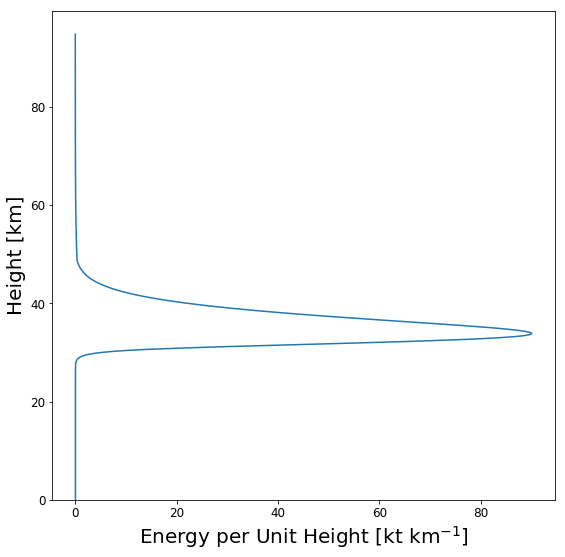

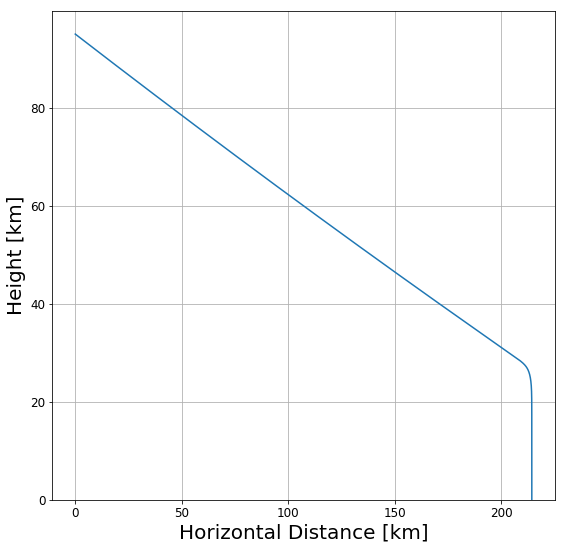

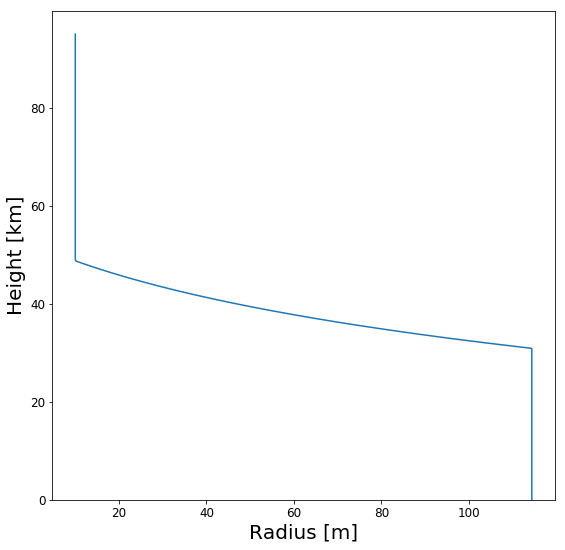

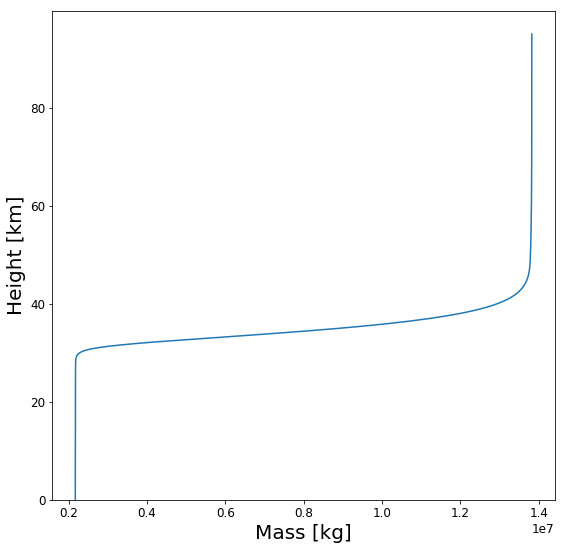

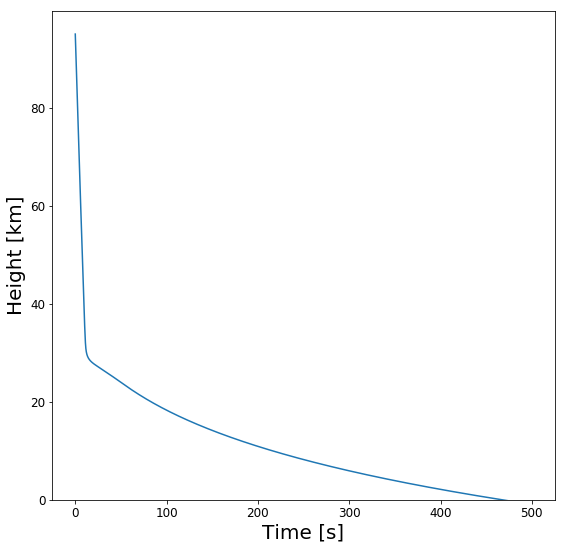

In [9]:
# built in plotting method
system.plot('eph')
system.plot('traject')
system.plot('radius')
system.plot('mass')
system.plot('height')

# an axis can be passes to get multiple systems to plot on the same graph for comparison

C:\Users\Richard\OneDrive - Imperial College London\_ACSE-4\Repo\asteroid_solver.py:184: RuntimeWarning: invalid value encountered in double_scalars
  dv = -(self.Cd * a_dens * A * v**2 / (2 * m)) \
C:\Users\Richard\OneDrive - Imperial College London\_ACSE-4\Repo\asteroid_solver.py:185: RuntimeWarning: invalid value encountered in sin
  + self.g * np.sin(theta)
C:\Users\Richard\OneDrive - Imperial College London\_ACSE-4\Repo\asteroid_solver.py:189: RuntimeWarning: invalid value encountered in cos
  - v * np.cos(theta) / (self.Rp + z)
C:\Users\Richard\OneDrive - Imperial College London\_ACSE-4\Repo\asteroid_solver.py:189: RuntimeWarning: invalid value encountered in double_scalars
  - v * np.cos(theta) / (self.Rp + z)
C:\Users\Richard\OneDrive - Imperial College London\_ACSE-4\Repo\asteroid_solver.py:190: RuntimeWarning: invalid value encountered in sin
  dz = -v * np.sin(theta)
C:\Users\Richard\OneDrive - Imperial College London\_ACSE-4\Repo\asteroid_solver.py:191: RuntimeWarning: inva

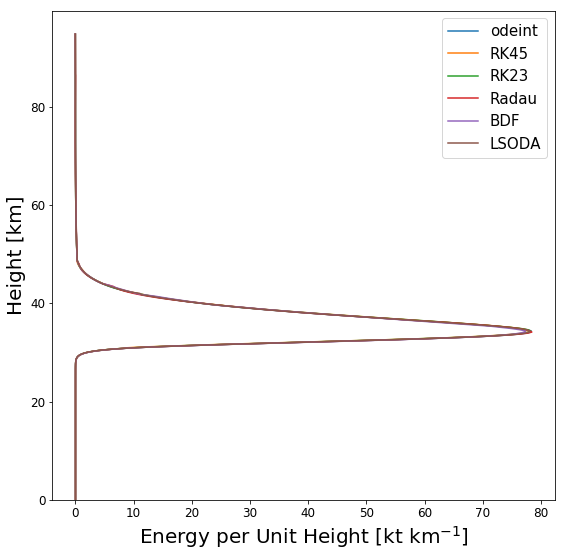

In [13]:
# system.solve_ivp(solver='RK45') allows for comparison of multiple solvers
ex.solver_comparison()

# 4 A comparison to an analytical solution
With the simplifying assumptions of:
- exponential atmosphere ($\rho_a = \rho_0 e^{-z/H}$)
- no gravitational acceleration ($g=0$)
- a flat planet ($R_p = \infty$)
- no lift ($C_L = 0$)
- no ablation ($\frac{dm}{dt}=0$)
- no fragmentation ($\sigma_0 = \infty$, $\frac{dr}{dt}=0$)

We can obtain the following simplifyed system

\begin{aligned} 
\frac{dv}{dt} & = \frac{-C_D\rho_0 A v^2}{2 m e^{-z/H}} + g \sin \theta \\
\frac{dz}{dt} & = -v\sin\theta \\
\end{aligned}

Using the chain rule:
\begin{aligned} 
\frac{dv}{dz} & = \frac{dv}{dt} \frac{dt}{dz}\\ 
\end{aligned}

WThe solution for velocity wrt height is:
\begin{aligned} 
\ln(v) = \frac{H C_D\rho_0 A e^{-z/H}}{2m \, sin\theta}+C \\ 
\end{aligned}

We can compare this simplified case to the numerical simulation

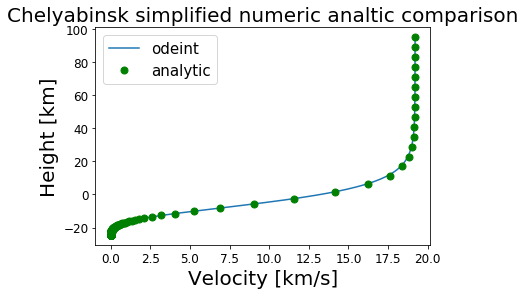

In [3]:
system = ex.visual_comp_chelyabinsk()


# 5 The accuracy of your numerical solution

There are two forms of uncertainty in our simulation:
1. The differences between the model and reality
2. The differences between the numerical solution and the true solution of the model

The first is found by comparison to real world data e.g. Chelyabinsk

The second is found by numerical comparison to an analytic solution where possible

[0.8137578  2.73676925]


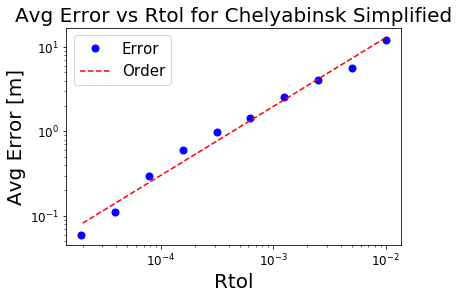

In [7]:
ex.rtol_error_simplified_chelyabinsk()

Comparison to fragmentation case was not found as no analytical solution to such a case exists and comparison to real world observations proved problematic as will be shown.

# 6 The impactor parameters for the Chelyabinsk airburst
Find the radius and stregth of the Chelyabinsk asteroid by comparison to the recorded observations.

## Solution algorithm
By calculating the difference between the observed peak and a numerical solution, this problem can be cast as a minimisation problem:

def minimise_function(strength, radius):

    solve system
    diff = peak_observed - peak_calculated
    return diff
    
This is then minimised to find the ideal strength and radius


Radius (m) = 8.464 
Strength (Pa) = 4005114.865 



   direc: array([[1., 0.],
       [0., 1.]])
     fun: 0.6513069364013322
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 2
  status: 0
 success: True
       x: array([8.46407662e+00, 4.00511486e+06])

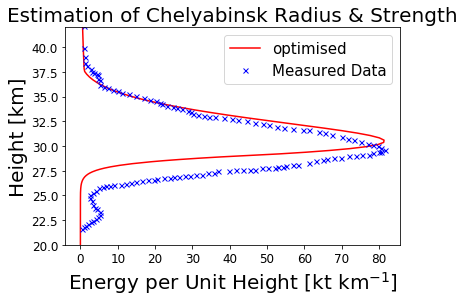

In [4]:
ex.find_chelyabinsk_params()

This is as close to the real data we can get, regardless of the rtol, highlighting the differences between our model and reality. Possible causes include:

- inaccurate fragmentation : spliting of the asteroid would lead to more significant ablation for smaller fragments
- ablation affect on shape : we only change the mass due to ablation but in reality the shape would be affected
- Approximate parameters : the fixed initial conditions in this optimisation are not exact and could cause this difference

This is why we could not estimate the error for a non-simplfied scenario as it is unclear what is numerical uncertainty and what is the uncertainty in the model 

#  7 Functionality to Other Atmospheres

As previously shown the system can have an externally defined atmospheric density function.

For this purpose a seperate function load_atmos(file) creates an atmospheric density function from a tabulated data set.

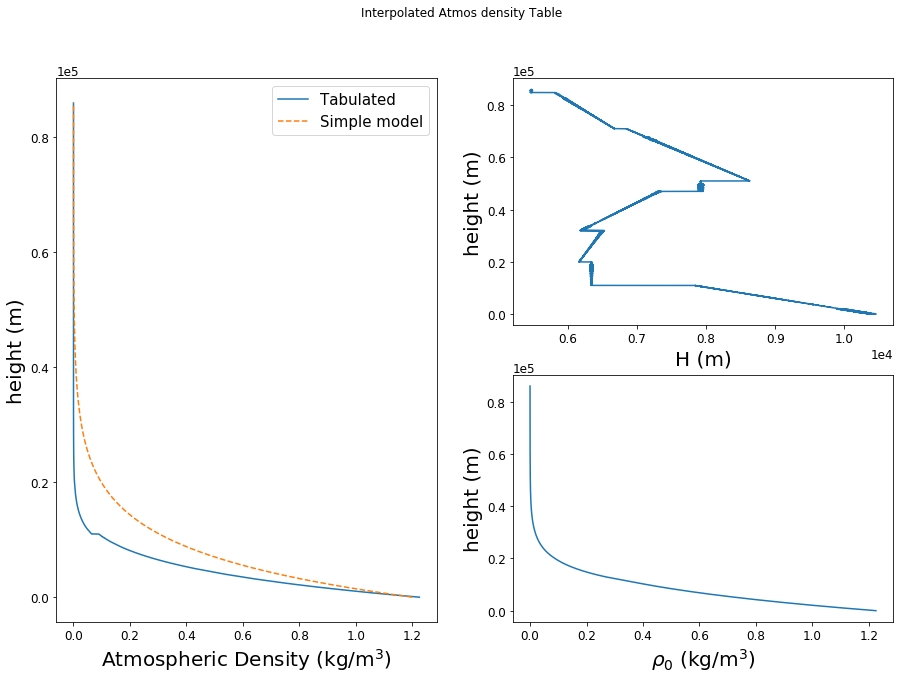

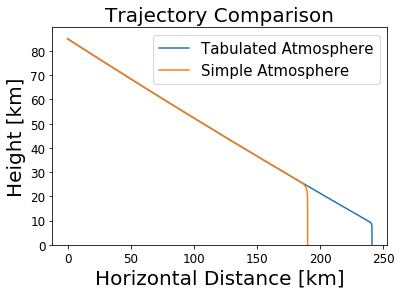

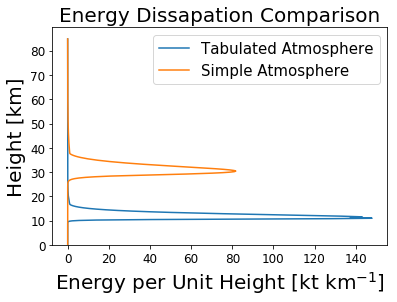

In [6]:
# comparison between earth simplifed atmosphere and tabulated data
ex.compare_earth_tabulated()

## Mars comparison

NASA's Mars Atmospheric Model was used to calculate Martian atmospheric density at a given height. Mars' atmospheric density was modelled to have two zones, upper and lower atmospheres, since its atmosphere isn't uniform as fluid properties vary with time and position, producing weather on Mars just like on Earth. The model attempts two separate curve fits for each zone.
The lower atmosphere occurs between the surface and continues to a vertical height of 7000m. Here, the pressure exponentially decreases and the tempreture reduces linearly given by the following expressions:

\begin{aligned}
p & =0 .699e^{-0.00009 h}
\end{aligned}
\begin{aligned}
T & = -23.4 - 0.00222  h
\end{aligned}

The upper atmosphere models the upper stratosphere and begins above 7000m and continues to 11100m. The pressure continues to decrease exponentially at the same rate and tempreture reduces linearly but at a lower rate:

\begin{aligned}
p & =0 .699 * e^{-0.00009 h} \\
T & = -23.4 - 0.00222  h
\end{aligned}

After the following parameter changes, we can model the cheylabinsk meteorite falling within Mars' atmosphere for comparison with Earth's.

\begin{aligned}
\rho_a & = \frac{p}{0.1921  (T + 273.1)}\\
\end{aligned}

The input parameters such as Planetary Radius, Acceleration due to Gravity and scale height of the atmosphere were specified as

\begin{aligned}
R_p & = 3390 km\\\
g & = 3.8 m s^{-2}\\
H & = 11.1 km\\
\end{aligned}

If the initial conditions of the Chelyabinsk meteor are applied we can get the following plots to compare with the tabulated earth atmosphere

 ex.compare_mars_tabulated()  # takes long time to run

<img src="marsvsearth_trajectory.png" width="640">
<img src="marsvsearth_energy.png" width="640">

# 9 Demonstration of functionality to perform a statistical ensemble
Take probability distributions of each parameter as inputs and return outcomes as probability distributions.
    
We defined a new function to solve this kind of problem. There are 5 parameters in our initial condition which are asteroid radius, entry velocity, density, strength and angle. Use velocity as an example. After using Gaussian distribution simulation of velocity and asteroid simulation, we find the burst distribution:

In [ ]:
# ex.test_ensumble()

# takes a while but gives
# peak height: 29.8327346 +- 0.5847118
# peak magnitude: 108.6919170 +- 11.2143439